### **Análisis del Dataset NASA Asteroids**

# **1. Estructura General del Dataset**

  Total de filas: 4,687 registros de asteroides

  Total de columnas: 40 variables que describen características de los asteroides
  
  Variable objetivo: "Hazardous" (booleano) - Indica si el asteroide es potencialmente peligroso

In [16]:
# Importar librerías necesarias
import pandas as pd #data processing
import numpy as np ##linear algebra
import requests

import csv
from pandas import DataFrame ## reading data as tables
import matplotlib.pyplot as plt
import seaborn as sns

import IPython.display as display
from IPython.display import HTML


## Data cleaning

In [17]:

# Cargar el dataset
df = pd.read_csv('/content/drive/MyDrive/NASA Asteroids Classification/nasa.csv')

# Información básica sobre el dataset
##Are inappropiate values? (after pront I can seethere are no inappropiate values)
print("\nInformación básica del dataset:")
df.info()

# Verificar valores nulos (after the observation we can see that there is no missing data or null values in the collected data)
print("\nValores nulos por columna:")
df.isnull().sum().head()





Información básica del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach    

,0
Neo Reference ID,0
Name,0
Absolute Magnitude,0
Est Dia in KM(min),0
Est Dia in KM(max),0


## Data Distribution

In [18]:
df.describe() ##description of data

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,1.179881e+12,13.970811,50294.919829,31251.307268,0.256778,99.886706,3.841347e+07,2.386902e+07,28.300619,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,1.981540e+11,7.293223,26255.601377,16314.209644,0.145798,56.715493,2.181110e+07,1.355279e+07,38.299668,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,7.889472e+11,0.335504,1207.814804,750.489149,0.000178,0.069194,2.660989e+04,1.653462e+04,1.000000,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,1.015574e+12,8.432865,30358.313370,18863.475327,0.133420,51.900211,1.995928e+07,1.240212e+07,9.000000,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,1.203062e+12,12.917889,46504.401181,28896.026390,0.265029,103.096123,3.964771e+07,2.463595e+07,16.000000,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,1.355558e+12,18.077649,65079.535405,40437.892430,0.384154,149.435921,5.746863e+07,3.570935e+07,31.000000,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,114294.420501,1.473318e+12,44.633747,160681.487851,99841.227826,0.499884,194.454910,7.478160e+07,4.646713e+07,611.000000,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [19]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)        # Ancho de la pantalla
pd.set_option('display.max_rows', 20)       # Limitar a 20 filas para mejor visualización

# Mostrar las primeras filas con todas las columnas
display.display(HTML(df.head(10).to_html()))


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
5,3671135,3671135,19.6,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,2344.363926,1995-01-15,790156800000,10.808844,38911.838251,24178.303051,0.392785,152.793274,58759768.0,36511628.0,Earth,40,2017-06-04 06:16:52,1,0.272213,4.724,2458000.5,0.563441,1.323532,17.927751,178.971951,556.160556,0.577800,198.145969,2.069265,2.458009e+06,354.237368,0.647295,J2000,False
6,2495323,2495323,19.6,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,2344.363926,1995-01-15,790156800000,10.808842,38911.829716,24178.297748,0.392783,152.792664,58759532.0,36511480.0,Earth,43,2017-06-28 06:19:25,1,0.272213,4.724,2458000.5,0.563441,1.323532,17.927748,178.971953,556.160544,0.577800,198.145960,2.069265,2.458009e+06,354.237396,0.647295,J2000,False
7,2153315,2153315,19.2,0.384198,0.859093,384.197891,859.092601,0.238729,0.533815,1260.491809,2818.545370,1995-01-22,790761600000,24.421884,87918.782382,54629.312308,0.129179,50.250694,19324928.0,12007954.0,Earth,22,2017-04-06 09:27:05,0,0.098758,4.921,2458000.5,0.449763,1.237475,34.695127,112.562984,502.808758,0.680905,288.374651,1.794045,2.458242e+06,186.776932,0.715978,J2000,False
8,2162463,2162463,17.8,0.732074,1.636967,732.073989,1636.967205,0.454890,1.017164,2401.817627,5370.627484,1995-01-22,790761600000,17.373784,62545.621813,38863.417065,0.358283,139.372055,53598364.0,33304478.0,Ea

# **2.- Multiclass Classification Problems**


##1.Clasificación Multiclase de Asteroides NASA
    Internet sobre cada caracteristica orgitales:
    Clasifica asteroides en 7 categorías según sus características orbitales:
    - *Earth-Crosser:* Cruzan la órbita de la Tierra con excentricidad moderada
    - *Earth-Crosser-HighEcc:* Cruzan la órbita de la Tierra con alta excentricidad
    - *Mars-Crosser:* Entre la Tierra y Marte con excentricidad moderada
    - *Mars-Crosser-HighEcc:* Entre la Tierra y Marte con alta excentricidad
    - *MainBelt-Low: *Cinturón principal con baja inclinación
    - *MainBelt-High:* Cinturón principal con alta inclinación
    - *Outer-Solar:* Más allá del cinturón principal
    


Primeras filas con la nueva variable objetivo 'OrbitalType':
   Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  Est Dia in Feet(max) Close Approach Date  Epoch Date Close Approach  Relative Velocity km per sec  Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  Miss Dist.(lunar)  Miss Dist.(kilometers)  Miss Dist.(miles) Orbiting Body  Orbit ID Orbit Determination Date  Orbit Uncertainity  Minimum Orbit Intersection  Jupiter Tisserand Invariant  Epoch Osculation  Eccentricity  Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  Perihelion Distance  Perihelion Arg  Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion Equinox  Hazardous           OrbitalType
0           3703080  3703080                21.6            0.127220            0.284472         127.219879         284.472297               0.079051 

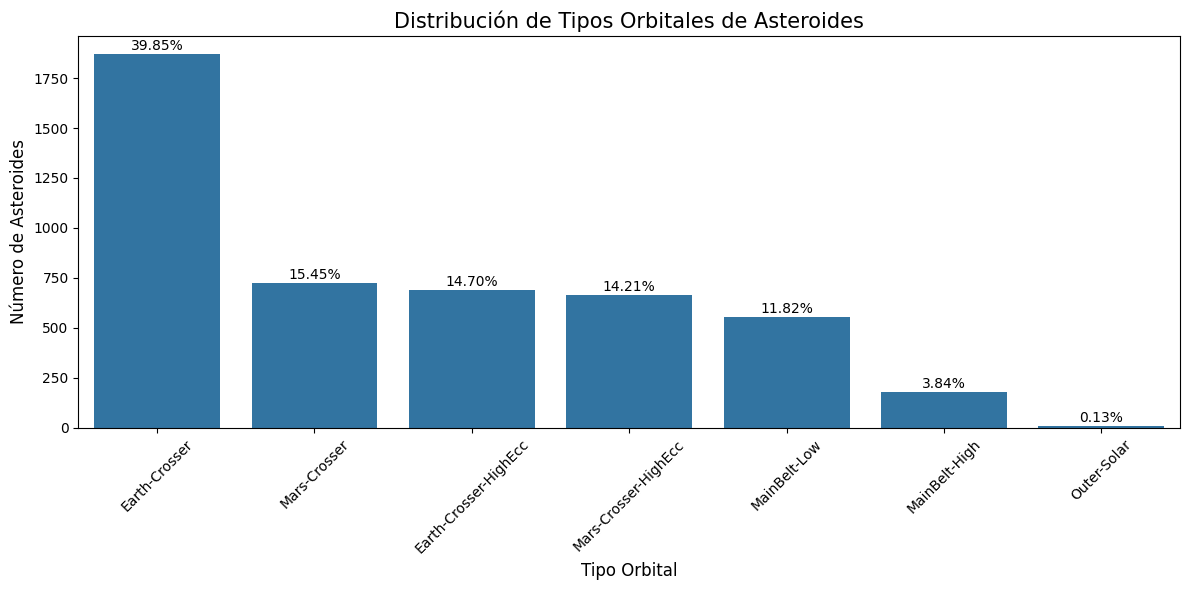

In [20]:

# variable objetivo multiclase (OrbitalType) basada en características orbitales
def classify_asteroid(row):

    semi_major_axis = row['Semi Major Axis']
    eccentricity = row['Eccentricity']
    inclination = row['Inclination']

    if semi_major_axis < 1.3:  # Aten y Apollo (cruzan la órbita terrestre)
        if eccentricity >= 0.4:
            return "Earth-Crosser-HighEcc"
        else:
            return "Earth-Crosser"
    elif semi_major_axis >= 1.3 and semi_major_axis < 2:  # Entre Tierra y Marte
        if eccentricity >= 0.4:
            return "Mars-Crosser-HighEcc"
        else:
            return "Mars-Crosser"
    elif semi_major_axis >= 2 and semi_major_axis < 3.3:  # Cinturón principal
        if inclination < 15:
            return "MainBelt-Low"
        else:
            return "MainBelt-High"
    else:  # Más allá del cinturón principal
        return "Outer-Solar"

df['OrbitalType'] = df.apply(classify_asteroid, axis=1)

print("\nPrimeras filas con la nueva variable objetivo 'OrbitalType':")
print(df.head())

# Analizar la distribución de la nueva variable objetivo
class_counts = df['OrbitalType'].value_counts()
class_percentages = df['OrbitalType'].value_counts(normalize=True) * 100

# Mostrar la distribución
distribution_df = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages
})

print("\nDistribución de clases de la variable objetivo 'OrbitalType':")
print(distribution_df)

# Visualizar
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribución de Tipos Orbitales de Asteroides', fontsize=15)
plt.xlabel('Tipo Orbital', fontsize=12)
plt.ylabel('Número de Asteroides', fontsize=12)
plt.xticks(rotation=45)


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,
        height + 20,
        f'{class_percentages.iloc[i]:.2f}%',
        ha="center"
    )

plt.tight_layout()
plt.show()



Datos curiosos para entender mejor la caracteristica


Estadísticas por tipo orbital:
                       Absolute Magnitude  Est Dia in KM(max)  Eccentricity  Inclination
OrbitalType                                                                             
Earth-Crosser                     23.4612              0.2650        0.2311      12.5204
Earth-Crosser-HighEcc             21.1391              0.6023        0.5169      15.6348
MainBelt-High                     19.5246              1.0106        0.6010      25.9614
MainBelt-Low                      21.9372              0.4791        0.5799       6.5285
Mars-Crosser                      22.1321              0.4709        0.2925      14.9573
Mars-Crosser-HighEcc              21.2656              0.6659        0.5406      13.9441
Outer-Solar                       20.8333              0.4347        0.6826      19.5059


<ipython-input-21-724d9bfe06e5>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
<ipython-input-21-724d9bfe06e5>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
<ipython-input-21-724d9bfe06e5>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
<ipython-input-21-724d9bfe06e5>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)


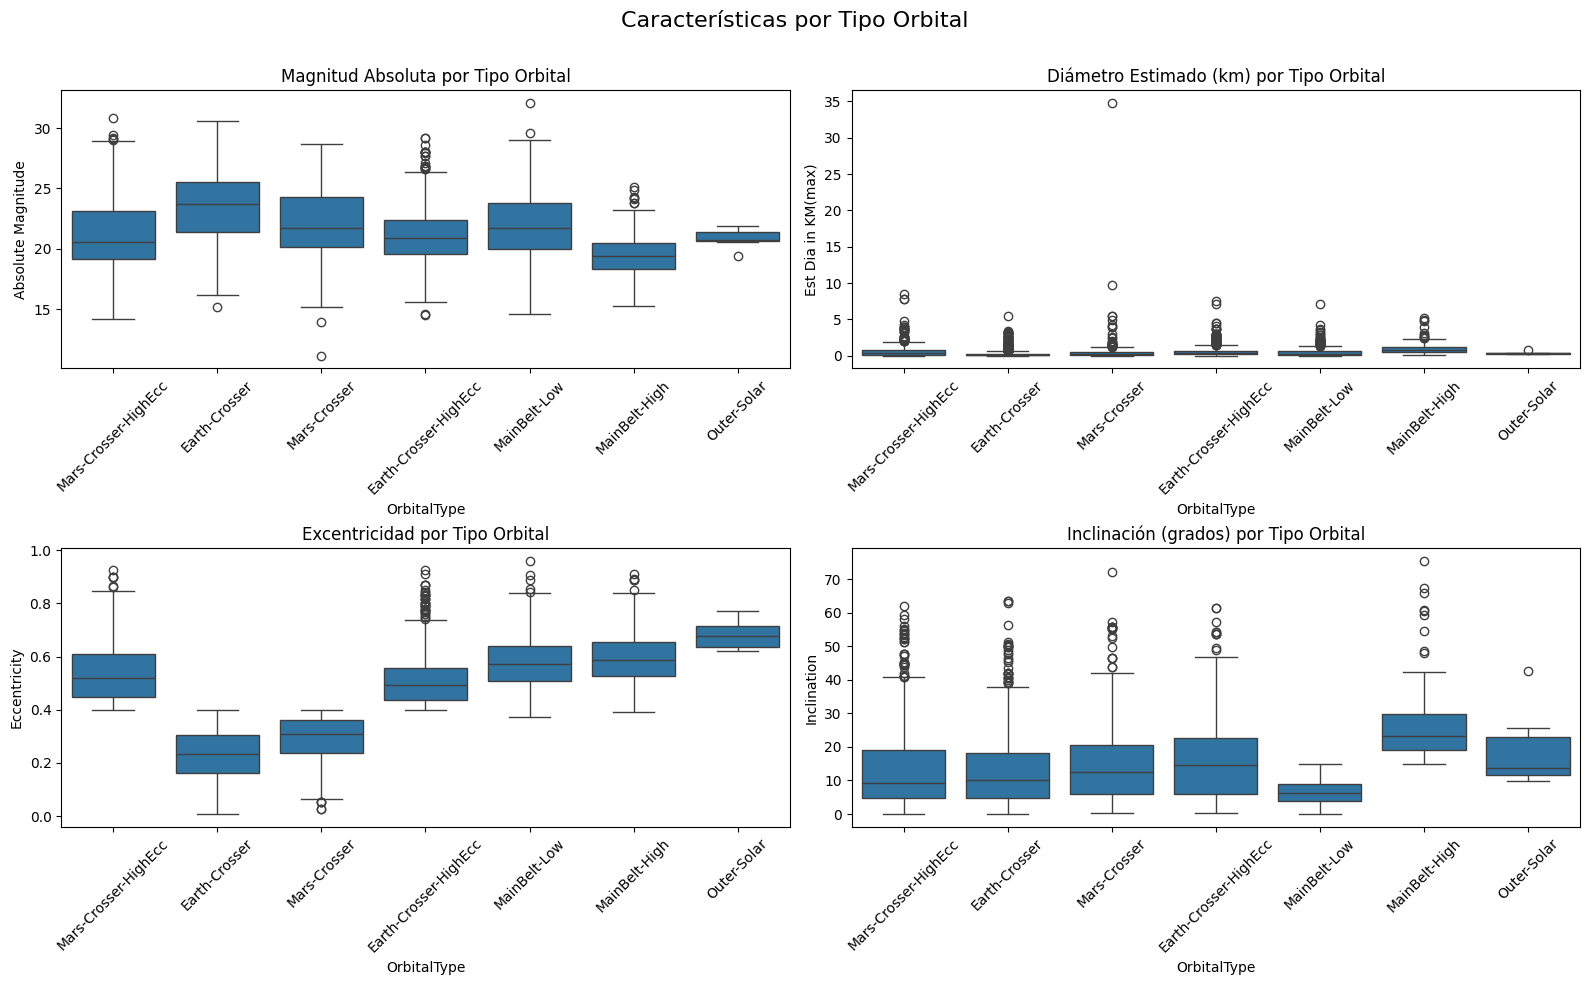


Dataset con variable objetivo guardado como 'nasa_with_orbital_types.csv'

Ejemplos de asteroides por clase:

Clase: Earth-Crosser
   Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  Est Dia in Feet(max) Close Approach Date  Epoch Date Close Approach  Relative Velocity km per sec  Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  Miss Dist.(lunar)  Miss Dist.(kilometers)  Miss Dist.(miles) Orbiting Body  Orbit ID Orbit Determination Date  Orbit Uncertainity  Minimum Orbit Intersection  Jupiter Tisserand Invariant  Epoch Osculation  Eccentricity  Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  Perihelion Distance  Perihelion Arg  Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion Equinox  Hazardous    OrbitalType
1           3723955  3723955                21.3            0.146068            0.32661

In [21]:
# Análisis de características por clase
print("\nEstadísticas por tipo orbital:")
class_stats = df.groupby('OrbitalType').agg({
    'Absolute Magnitude': 'mean',
    'Est Dia in KM(max)': 'mean',
    'Eccentricity': 'mean',
    'Inclination': 'mean'
}).round(4)

print(class_stats)

# Visualizar las características por clase
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Características por Tipo Orbital', fontsize=16)

# Diagrama de caja para Magnitud Absoluta
sns.boxplot(x='OrbitalType', y='Absolute Magnitude', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Magnitud Absoluta por Tipo Orbital')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Diagrama de caja para Diámetro
sns.boxplot(x='OrbitalType', y='Est Dia in KM(max)', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Diámetro Estimado (km) por Tipo Orbital')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Diagrama de caja para Excentricidad
sns.boxplot(x='OrbitalType', y='Eccentricity', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Excentricidad por Tipo Orbital')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Diagrama de caja para Inclinación
sns.boxplot(x='OrbitalType', y='Inclination', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Inclinación (grados) por Tipo Orbital')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Guardar el dataset con la nueva variable objetivo
df.to_csv('/content/nasa_with_orbital_types.csv', index=False)
print("\nDataset con variable objetivo guardado como 'nasa_with_orbital_types.csv'")

# Visualizar algunos ejemplos de cada clase
print("\nEjemplos de asteroides por clase:")
for class_name in class_counts.index:
    print(f"\nClase: {class_name}")
    print(df[df['OrbitalType'] == class_name].head(2))

## 2. Clasificación por Nivel de Riesgo
Esta clasificación combinaría múltiples factores para crear una evaluación integral del riesgo potencial:

    Clasifica asteroides en 6 categorías según múltiples factores de riesgo:
    - Negligible: Muy pequeño y/o distante
    - Very Low: Pequeño y distante
    - Low: Tamaño moderado o acercamiento moderado
    - Moderate: Combinación de factores de riesgo intermedios
    - High: Grande y cercano
    - Extreme: Combinación de factores de alto riesgo


In [22]:
def classify_by_risk(row):
    diameter = row['Est Dia in KM(max)']
    miss_distance = row['Miss Dist.(Astronomical)']
    velocity = row['Relative Velocity km per sec']

    # Factor de tamaño (0-4)
    if diameter < 0.05:
        size_factor = 0
    elif diameter < 0.2:
        size_factor = 1
    elif diameter < 1.0:
        size_factor = 2
    elif diameter < 5.0:
        size_factor = 3
    else:
        size_factor = 4

    # Factor de distancia (0-4)
    if miss_distance > 0.3:
        distance_factor = 0
    elif miss_distance > 0.1:
        distance_factor = 1
    elif miss_distance > 0.05:
        distance_factor = 2
    elif miss_distance > 0.01:
        distance_factor = 3
    else:
        distance_factor = 4

    # Factor de velocidad (0-2)
    if velocity < 10:
        velocity_factor = 0
    elif velocity < 20:
        velocity_factor = 1
    else:
        velocity_factor = 2

    # Puntuación de riesgo combinada
    risk_score = size_factor + distance_factor + velocity_factor

    # Clasificación por puntuación
    if risk_score <= 2:
        return "Negligible"
    elif risk_score <= 4:
        return "Very Low"
    elif risk_score <= 6:
        return "Low"
    elif risk_score <= 8:
        return "Moderate"
    elif risk_score <= 10:
        return "High"
    else:
        return "Extreme"

df['RiskClass'] = df.apply(classify_by_risk, axis=1)

In [23]:
# Analizar la distribución de
class_counts = df['RiskClass'].value_counts()
class_percentages = df['RiskClass'].value_counts(normalize=True) * 100

# Mostrar la distribución de clases
distribution_df = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages
})

print("\nDistribución de clases de la variable objetivo 'RiskClass':")
print(distribution_df)


Distribución de clases de la variable objetivo 'RiskClass':
            Count  Percentage
RiskClass                    
Very Low     2556   54.533817
Negligible   1358   28.973757
Low           751   16.023042
Moderate       22    0.469383


## 3. Clasificación por Potencial Científico
Esta clasificación se centraría en el interés científico potencial del asteroide:

    Clasifica asteroides por su potencial interés científico:
    - Common: Asteroide típico
    - Eccentric: Órbita inusual
    - FastRotator: Rotación rápida inferida
    - Pristine: Potencialmente prístino
    - Metallic: Potencialmente metálico
    - Peculiar: Características poco comunes


In [24]:
def classify_by_scientific_potential(row):
    # Define characteristics that make asteroids scientifically interesting
    has_unusual_orbit = (row['Eccentricity'] > 0.7 or row['Inclination'] > 40)
    has_unusual_composition = (row['Absolute Magnitude'] < 16 or row['Est Dia in KM(max)'] > 5)
    potentially_pristine = (row['Aphelion Dist'] > 3.5 and row['Perihelion Distance'] > 2.5)
    potentially_metallic = (row['Absolute Magnitude'] > 15 and row['Absolute Magnitude'] < 18)
    fast_rotation = (row['Mean Motion'] > 0.9)

    # Classify based on characteristics
    if potentially_pristine:
        return "Pristine"
    elif potentially_metallic:
        return "Metallic"
    elif fast_rotation:
        return "FastRotator"
    elif has_unusual_orbit:
        return "Eccentric"
    elif has_unusual_composition:
        return "Peculiar"
    else:
        return "Common"

# Apply classification
df['ScientificPotential'] = df.apply(classify_by_scientific_potential, axis=1)

In [25]:
# Analizar la distribución de
class_counts = df['ScientificPotential'].value_counts()
class_percentages = df['ScientificPotential'].value_counts(normalize=True) * 100

# Mostrar la distribución de clases
distribution_df = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages
})

print("\nDistribución de clases de la variable objetivo 'ScientificPotential':")
print(distribution_df)


Distribución de clases de la variable objetivo 'ScientificPotential':
                     Count  Percentage
ScientificPotential                   
Common                2693   57.456795
FastRotator           1517   32.366119
Eccentric              256    5.461916
Metallic               216    4.608492
Peculiar                 5    0.106678


# **3 Data Exploration and Preprocessing**


# - Feature Elimination Strategy Implementation


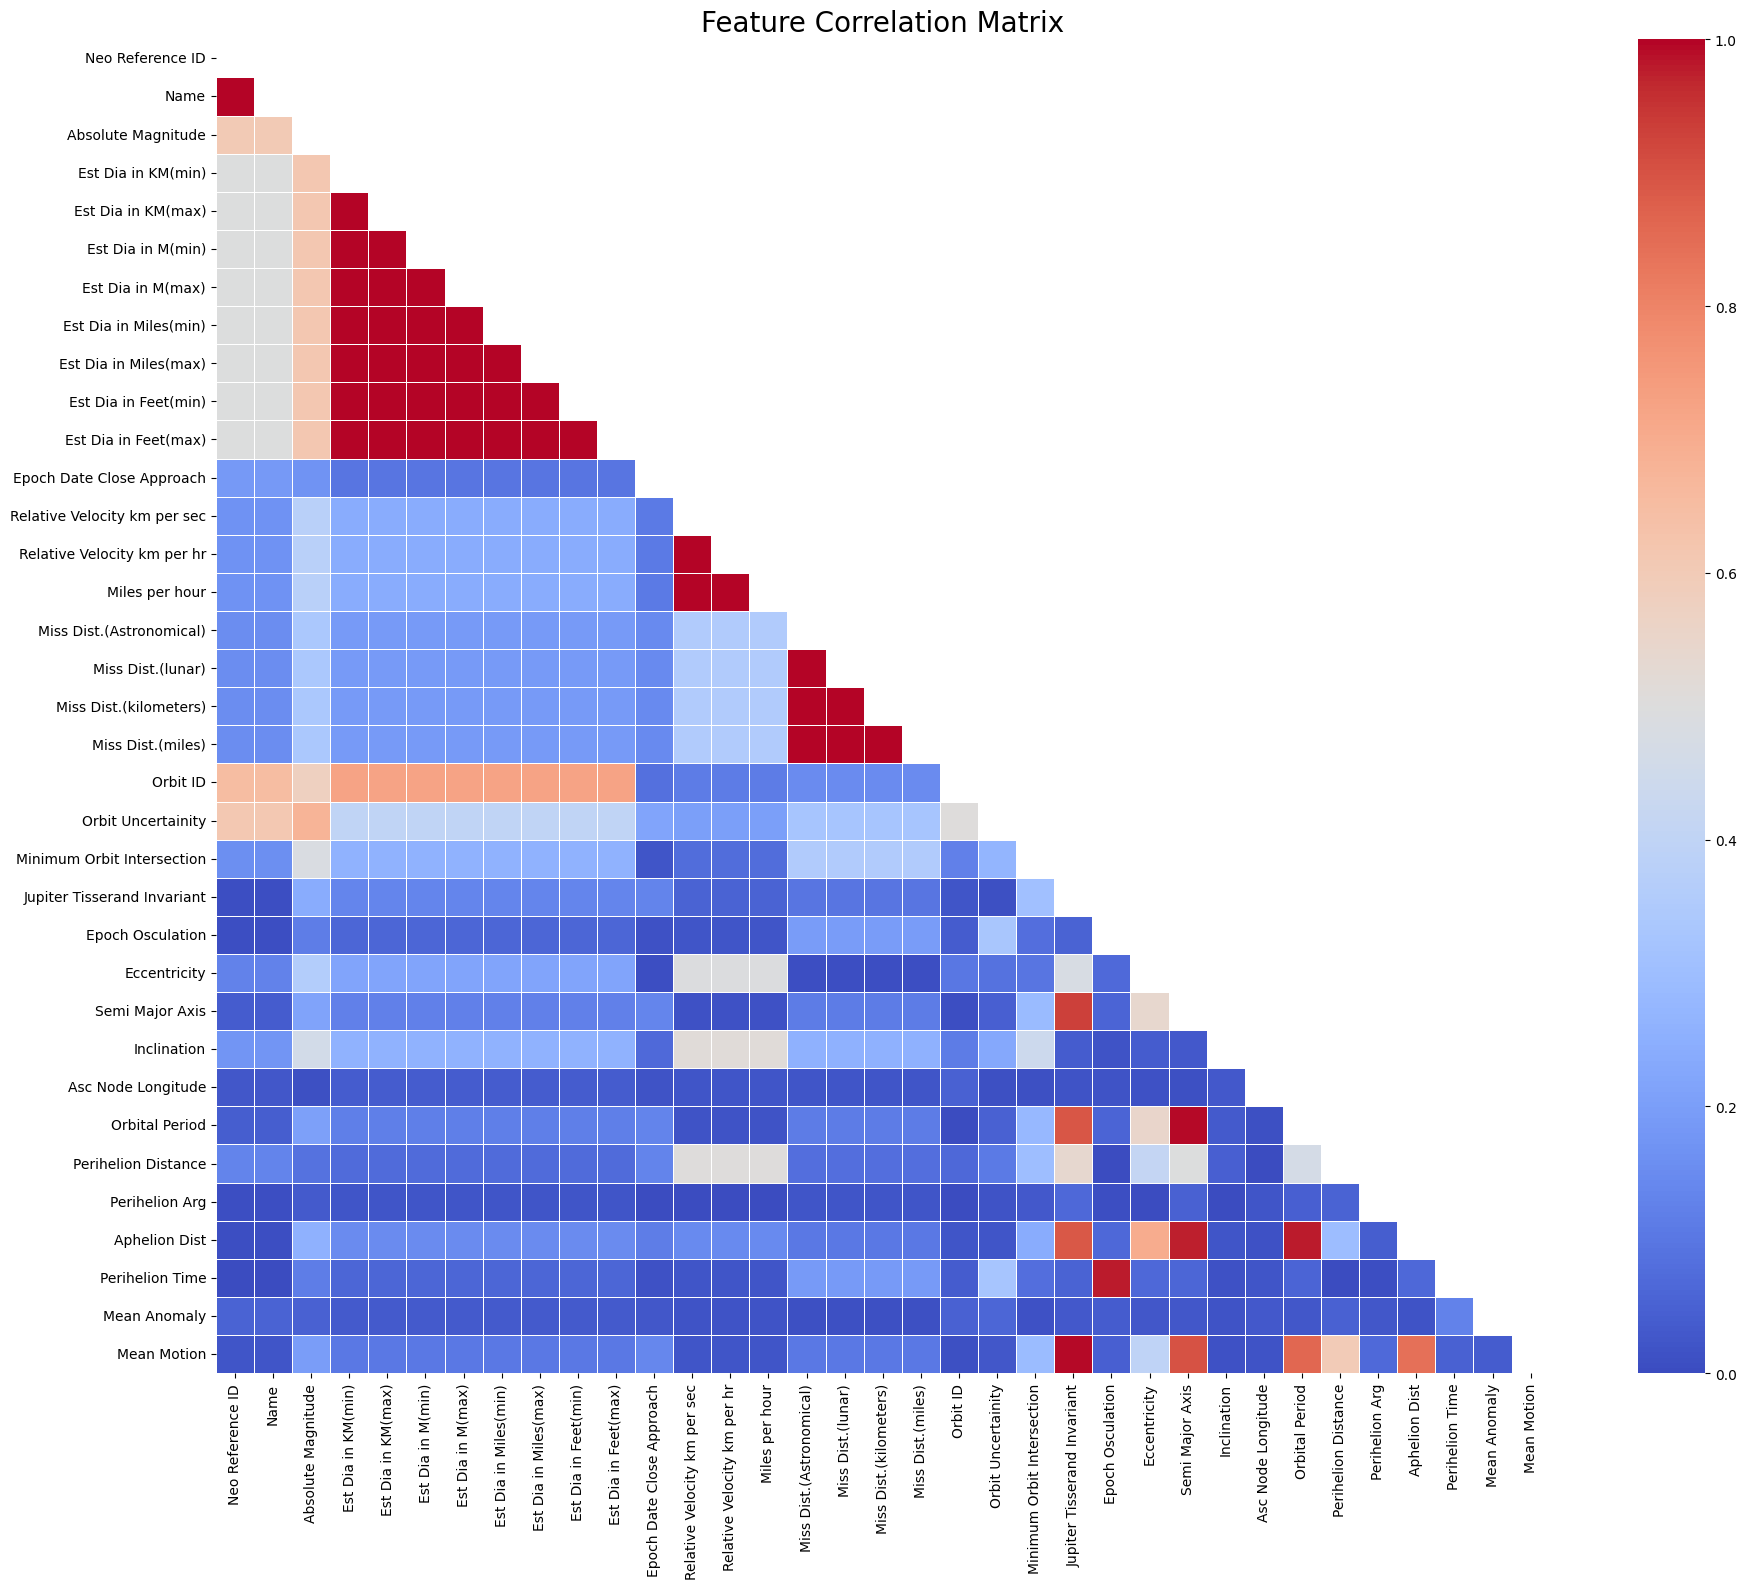

Highly correlated feature pairs:
               Feature 1                    Feature 2  Correlation
16  Est Dia in Feet(min)           Est Dia in KM(min)     1.000000
6      Est Dia in M(max)            Est Dia in M(min)     1.000000
20  Est Dia in Feet(min)        Est Dia in Miles(min)     1.000000
22  Est Dia in Feet(max)           Est Dia in KM(min)     1.000000
1     Est Dia in KM(max)           Est Dia in KM(min)     1.000000
..                   ...                          ...          ...
46           Mean Motion              Semi Major Axis     0.901396
39        Orbital Period  Jupiter Tisserand Invariant     0.893517
41         Aphelion Dist  Jupiter Tisserand Invariant     0.887879
47           Mean Motion               Orbital Period     0.859462
48           Mean Motion                Aphelion Dist     0.840166

[49 rows x 3 columns]


In [26]:
#  correlation matrix
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr().abs()
# mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=1.0, vmin=0,
            annot=False, square=True, linewidths=.5)
plt.title('Feature Correlation Matrix', fontsize=20)
plt.tight_layout()
plt.show()


threshold = 0.8
high_corr_features = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            high_corr_features.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Display
high_corr_df = pd.DataFrame(high_corr_features, columns=['Feature 1', 'Feature 2', 'Correlation'])
high_corr_df = high_corr_df.sort_values('Correlation', ascending=False)
print("Highly correlated feature pairs:")
print(high_corr_df)

# - standardize your data first, then apply the feature elimination strategy:

In [27]:
from sklearn.preprocessing import StandardScaler

numeric_features = df.select_dtypes(include=['float64', 'int64']).copy()
categorical_cols = [col for col in df.columns if col not in numeric_features.columns]

# StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)

# Level 1: Remove highly correlated measurement features
measurement_features_to_remove = [
    'Est Dia in M(min)', 'Est Dia in M(max)',
    'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
    'Est Dia in Feet(min)', 'Est Dia in Feet(max)'
]
# Remove
orbital_features_to_remove = [
    'Jupiter Tisserand Invariant',  # Correlated with Mean Motion & Orbital Period
    'Aphelion Dist',                # Correlated with Semi Major Axis
    'Mean Motion'                   # Correlated with Semi Major Axis & Orbital Period
]
level1_features_to_remove = measurement_features_to_remove + orbital_features_to_remove
# Create Level 1 difficulty dataset
X_level1 = scaled_df.drop(columns=level1_features_to_remove, errors='ignore')
print("Level 1 Features Removed:")
for feature in level1_features_to_remove:
    print(f"- {feature}")
print(f"\nOriginal feature count: {scaled_df.shape[1]}")
print(f"Level 1 feature count: {X_level1.shape[1]}")
print(f"Features removed: {scaled_df.shape[1] - X_level1.shape[1]}")

for col in categorical_cols:
    if col in df.columns:
        X_level1[col] = df[col]

print("\nFirst 5 rows of Level 1 dataset:")
print(X_level1.head())

X_level1.to_csv('nasa_asteroids_level1_difficulty.csv', index=False)
print("\nLevel 1 dataset saved to 'nasa_asteroids_level1_difficulty.csv'")

Level 1 Features Removed:
- Est Dia in M(min)
- Est Dia in M(max)
- Est Dia in Miles(min)
- Est Dia in Miles(max)
- Est Dia in Feet(min)
- Est Dia in Feet(max)
- Jupiter Tisserand Invariant
- Aphelion Dist
- Mean Motion

Original feature count: 35
Level 1 feature count: 26
Features removed: 9

First 5 rows of Level 1 dataset:
   Neo Reference ID      Name  Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  Epoch Date Close Approach  Relative Velocity km per sec  Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  Miss Dist.(lunar)  Miss Dist.(kilometers)  Miss Dist.(miles)  Orbit ID  Orbit Uncertainity  Minimum Orbit Intersection  Epoch Osculation  Eccentricity  Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  Perihelion Distance  Perihelion Arg  Perihelion Time  Mean Anomaly Close Approach Date Orbiting Body Orbit Determination Date Equinox  Hazardous           OrbitalType   RiskClass ScientificPotential
0          0.785321  0.785321       

# - Model Evaluation **Identifying** feature importance to create additional difficulty levels

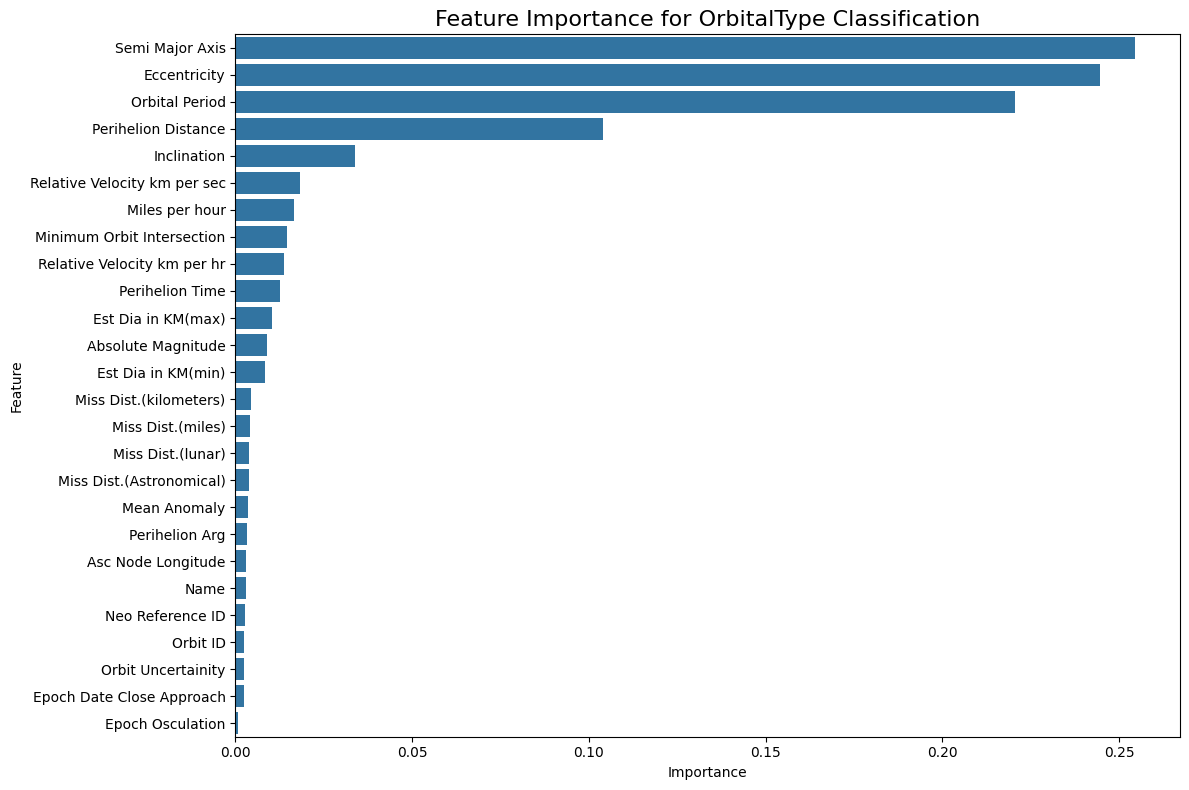

Feature importance ranking:
                      Feature  Importance
18            Semi Major Axis    0.254493
17               Eccentricity    0.244593
21             Orbital Period    0.220453
22        Perihelion Distance    0.104032
19                Inclination    0.033801
..                        ...         ...
0            Neo Reference ID    0.002583
13                   Orbit ID    0.002526
14         Orbit Uncertainity    0.002446
5   Epoch Date Close Approach    0.002323
16           Epoch Osculation    0.000853

[26 rows x 2 columns]

Difficulty Levels Created:
Level 1 (Current): 26 features
Level 2 (- Top 5): 21 features - Removed: Semi Major Axis, Eccentricity, Orbital Period, Perihelion Distance, Inclination
Level 3 (- Top 10): 16 features - Removed: Semi Major Axis, Eccentricity, Orbital Period, Perihelion Distance, Inclination, Relative Velocity km per sec, Miles per hour, Minimum Orbit Intersection, Relative Velocity km per hr, Perihelion Time
Level 4 (Bottom 10 on

<ipython-input-28-0baa974e00bf>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_level4[target] = df[target]
<ipython-input-28-0baa974e00bf>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_level4[target] = df[target]
<ipython-input-28-0baa974e00bf>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.


All difficulty level datasets saved to CSV files.


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the Level 1 dataset
df = pd.read_csv('nasa_asteroids_level1_difficulty.csv')


X = df.copy()
 # Using OrbitalType as target variable
y = df['OrbitalType']

target_columns = ['OrbitalType', 'RiskClass', 'ScientificPotential', 'Hazardous']
non_numeric = ['Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox']
columns_to_remove = target_columns + non_numeric

for col in columns_to_remove:
    if col in X.columns:
        X = X.drop(col, axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Random Forest (100 árboles)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance for OrbitalType Classification', fontsize=16)
plt.tight_layout()
plt.savefig('feature_importance.png')  # Save the plot
plt.show()

print("Feature importance ranking:")
print(feature_importances)

# Create Level 2
top_5_features = feature_importances.head(5)['Feature'].tolist()
X_level2 = X.drop(columns=top_5_features)

# Create Level 3
top_10_features = feature_importances.head(10)['Feature'].tolist()
X_level3 = X.drop(columns=top_10_features)


bottom_10_features = feature_importances.tail(10)['Feature'].tolist()
X_level4 = X[bottom_10_features]


print("\nDifficulty Levels Created:")
print(f"Level 1 (Current): {X.shape[1]} features")
print(f"Level 2 (- Top 5): {X_level2.shape[1]} features - Removed: {', '.join(top_5_features)}")
print(f"Level 3 (- Top 10): {X_level3.shape[1]} features - Removed: {', '.join(top_10_features)}")
print(f"Level 4 (Bottom 10 only): {X_level4.shape[1]} features - Kept only: {', '.join(bottom_10_features)}")



for target in target_columns:
    if target in df.columns:
        X_level2[target] = df[target]
        X_level3[target] = df[target]
        X_level4[target] = df[target]

X_level2.to_csv('nasa_asteroids_level2_difficulty.csv', index=False)
X_level3.to_csv('nasa_asteroids_level3_difficulty.csv', index=False)
X_level4.to_csv('nasa_asteroids_level4_difficulty.csv', index=False)

print("\nAll difficulty level datasets saved to CSV files.")

# - Evaluate Model Performance (Initial model comparison across difficulty levels)


Evaluating models on Level 1...
  Training Random Forest...
    Accuracy: 0.9979
  Training Gradient Boosting...
    Accuracy: 0.9979
  Training AdaBoost...
    Accuracy: 0.9595
  Training Balanced Random Forest...
    Accuracy: 0.9350
  Training Voting (Hard)...
    Accuracy: 0.9957
  Training Voting (Soft)...
    Accuracy: 0.9989
  Training Stacking...
    Accuracy: 0.9989
  Training XGBoost...
    Accuracy: 0.9968

Evaluating models on Level 2...
  Training Random Forest...
    Accuracy: 0.6610
  Training Gradient Boosting...
    Accuracy: 0.7004
  Training AdaBoost...
    Accuracy: 0.5853
  Training Balanced Random Forest...
    Accuracy: 0.3998
  Training Voting (Hard)...
    Accuracy: 0.6439
  Training Voting (Soft)...
    Accuracy: 0.6588
  Training Stacking...
    Accuracy: 0.6557
  Training XGBoost...
    Accuracy: 0.7932

Evaluating models on Level 3...
  Training Random Forest...
    Accuracy: 0.5533
  Training Gradient Boosting...
    Accuracy: 0.5416
  Training AdaBoost..

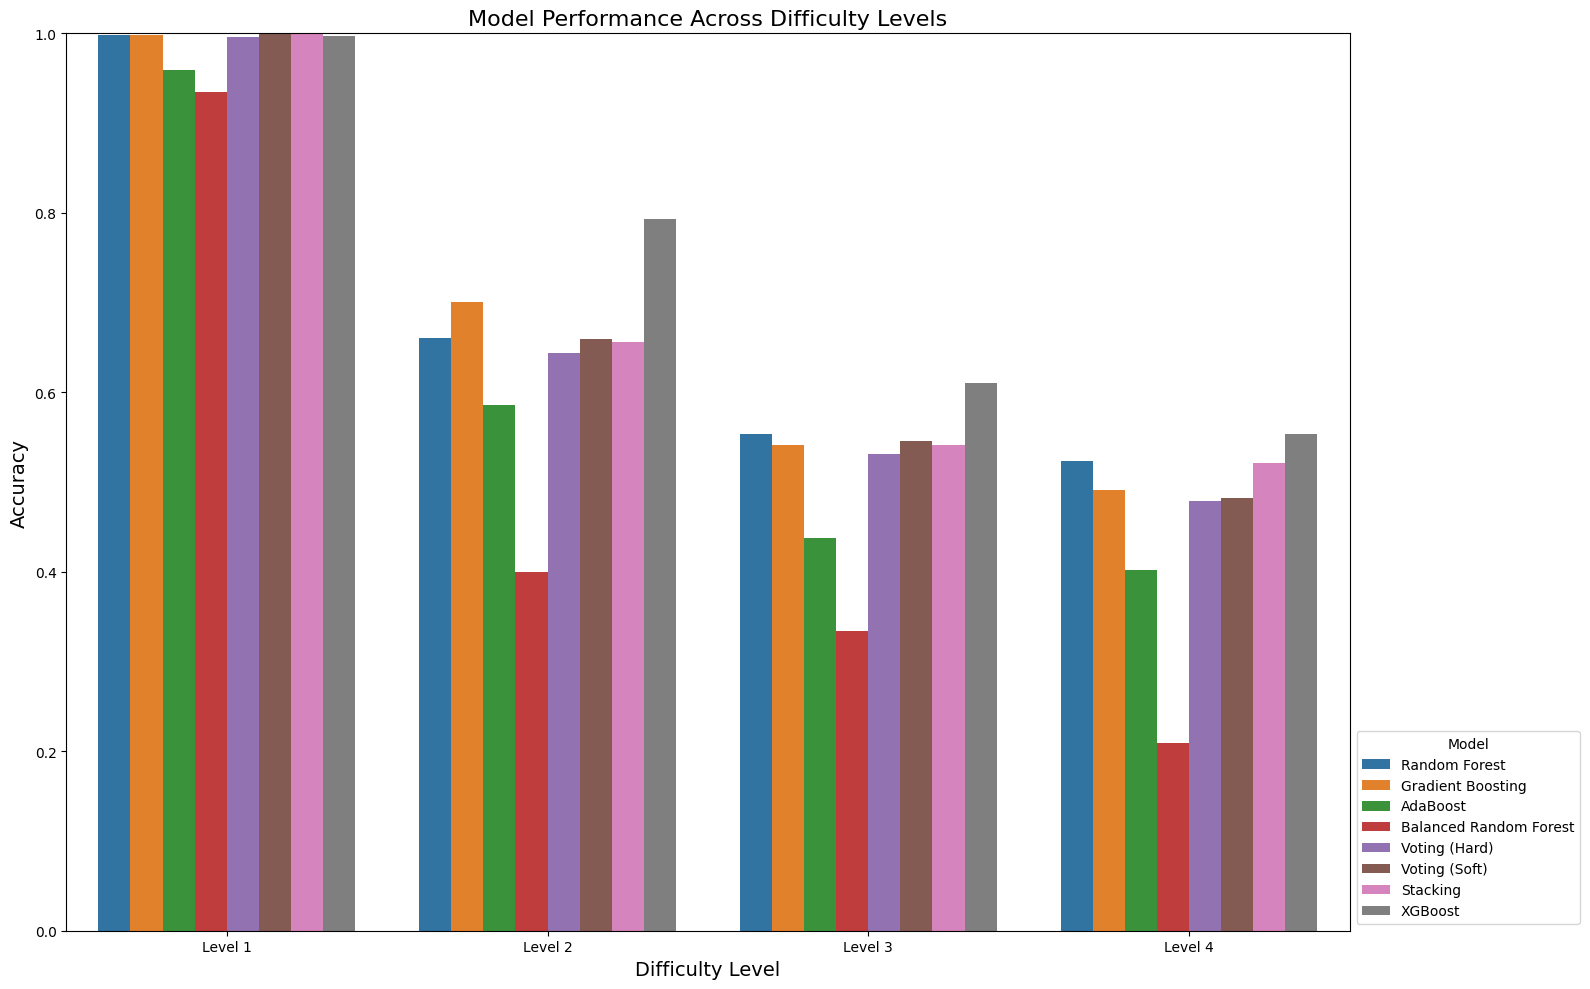


Model Performance Summary:
Difficulty               Level 1   Level 2   Level 3   Level 4
Model                                                         
AdaBoost                0.959488  0.585288  0.437100  0.401919
Balanced Random Forest  0.934968  0.399787  0.333689  0.208955
Gradient Boosting       0.997868  0.700426  0.541578  0.491471
Random Forest           0.997868  0.660981  0.553305  0.523454
Stacking                0.998934  0.655650  0.541578  0.521322
Voting (Hard)           0.995736  0.643923  0.530917  0.478678
Voting (Soft)           0.998934  0.658849  0.545842  0.481876
XGBoost                 0.996802  0.793177  0.610874  0.553305

Feature Counts by Level:
     Level  Feature Count
0  Level 1             26
1  Level 2             21
2  Level 3             16
3  Level 4             10

Performance Drop Analysis:
Difficulty               Level 1   Level 4  Level 1 to 4 Drop  Drop Percentage
Model                                                                         


In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate a model on a specific difficulty level
def evaluate_model(model_name, model, X_train, X_test, y_train, y_test, difficulty_level, label_encoder=None):
    # Si estamos usando XGBoost y tenemos un label_encoder, transformamos las etiquetas
    if model_name == 'XGBoost' and label_encoder is not None:
        y_train_encoded = label_encoder.transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)
        # Entrenamos con etiquetas numéricas
        model.fit(X_train, y_train_encoded)
        # Predecimos etiquetas numéricas
        y_pred_encoded = model.predict(X_test)
        # Convertimos de vuelta a etiquetas originales
        y_pred = label_encoder.inverse_transform(y_pred_encoded)
    else:
        # Para otros modelos, entrenamiento normal
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Return results
    return {
        'Model': model_name,
        'Difficulty': difficulty_level,
        'Accuracy': accuracy,
        'Feature Count': X_train.shape[1]
    }

# Creamos nuestro label encoder para XGBoost
label_encoder = LabelEncoder()

# Creamos todos los modelos
# List of models to evaluate
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=42),
    'Balanced Random Forest': BalancedRandomForestClassifier(n_estimators=100, random_state=42),
    'Voting (Hard)': VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(random_state=42)),
            ('gb', GradientBoostingClassifier(random_state=42)),
            ('svc', SVC(random_state=42))
        ],
        voting='hard'
    ),
    'Voting (Soft)': VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(random_state=42)),
            ('gb', GradientBoostingClassifier(random_state=42)),
            ('svc', SVC(probability=True, random_state=42))
        ],
        voting='soft'
    ),
    'Stacking': StackingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000, random_state=42)),  # Aumentado max_iter
            ('rf', RandomForestClassifier(random_state=42)),
            ('svc', SVC(probability=True, random_state=42))
        ],
        final_estimator=RandomForestClassifier(random_state=42),
        cv=5
    ),
    'XGBoost': xgb.XGBClassifier(random_state=42)  # Simplificamos XGBoost
}

# Load all datasets
levels = {
    'Level 1': pd.read_csv('nasa_asteroids_level1_difficulty.csv'),
    'Level 2': pd.read_csv('nasa_asteroids_level2_difficulty.csv'),
    'Level 3': pd.read_csv('nasa_asteroids_level3_difficulty.csv'),
    'Level 4': pd.read_csv('nasa_asteroids_level4_difficulty.csv')
}

# Target variable
target = 'OrbitalType'

# Store results
results = []

# Definimos las clases para el LabelEncoder
all_classes = set()
for _, df in levels.items():
    all_classes.update(df[target].unique())
label_encoder.fit(list(all_classes))

# Loop through each difficulty level
for level_name, df in levels.items():
    print(f"\nEvaluating models on {level_name}...")

    # Prepare data
    X = df.drop(columns=['OrbitalType', 'RiskClass', 'ScientificPotential', 'Hazardous',
                         'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date',
                         'Equinox'], errors='ignore')
    y = df[target]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Evaluate each model
    for model_name, model in models.items():
        print(f"  Training {model_name}...")
        try:
            result = evaluate_model(model_name, model, X_train, X_test, y_train, y_test,
                                   level_name, label_encoder if model_name == 'XGBoost' else None)
            results.append(result)
            print(f"    Accuracy: {result['Accuracy']:.4f}")
        except Exception as e:
            print(f"    Error with {model_name}: {e}")
            continue

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Visualize results
plt.figure(figsize=(16, 10))  # Hecho más grande para acomodar más modelos
sns.barplot(x='Difficulty', y='Accuracy', hue='Model', data=results_df)
plt.title('Model Performance Across Difficulty Levels', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Model', loc='lower left', bbox_to_anchor=(1, 0))  # Movido la leyenda
plt.tight_layout()
plt.savefig('model_performance_comparison.png', bbox_inches='tight')  # Asegurar que se guarde bien
plt.show()

# Print summary table
pivot_table = results_df.pivot_table(
    index='Model', columns='Difficulty', values='Accuracy', aggfunc='mean'
)
print("\nModel Performance Summary:")
print(pivot_table)

# Get feature counts
feature_counts = []
for level_name, df in levels.items():
    non_target_cols = ['OrbitalType', 'RiskClass', 'ScientificPotential', 'Hazardous',
                      'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox']
    feature_count = len([col for col in df.columns if col not in non_target_cols])
    feature_counts.append({'Level': level_name, 'Feature Count': feature_count})

feature_count_df = pd.DataFrame(feature_counts)
print("\nFeature Counts by Level:")
print(feature_count_df)

# Calculate performance drop
performance_drop = results_df.pivot_table(
    index='Model', columns='Difficulty', values='Accuracy', aggfunc='mean'
)
performance_drop['Level 1 to 4 Drop'] = performance_drop['Level 1'] - performance_drop['Level 4']
performance_drop['Drop Percentage'] = (performance_drop['Level 1 to 4 Drop'] / performance_drop['Level 1']) * 100

print("\nPerformance Drop Analysis:")
print(performance_drop[['Level 1', 'Level 4', 'Level 1 to 4 Drop', 'Drop Percentage']])

# - Implement SMOTE for imbalance mitigation:





Evaluating models on Level 1...
  Standard evaluation (without SMOTE):
    Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.9979, F1 Score: 0.9973, MCC: 0.9972
    Training Gradient Boosting...
      Accuracy: 0.9979, F1 Score: 0.9979, MCC: 0.9972
    Training AdaBoost...
      Accuracy: 0.9595, F1 Score: 0.9426, MCC: 0.9484
    Training Balanced Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.9350, F1 Score: 0.9366, MCC: 0.9164
    Training Voting (Hard)...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.9957, F1 Score: 0.9952, MCC: 0.9944
    Training Voting (Soft)...
      Accuracy: 0.9989, F1 Score: 0.9989, MCC: 0.9986
    Training Stacking...
      Accuracy: 0.9989, F1 Score: 0.9991, MCC: 0.9986
    Training XGBoost...
      Accuracy: 0.9968, F1 Score: 0.9968, MCC: 0.9958
  Applying SMOTE for class balance:
    Original class distribution: {'Earth-Crosser': 1494, 'Mars-Crosser': 579, 'Earth-Crosser-HighEcc': 551, 'Mars-Crosser-HighEcc': 533, 'MainBelt-Low': 443, 'MainBelt-High': 144, 'Outer-Solar': 5}
    SMOTE class distribution: {'Earth-Crosser-HighEcc': 1494, 'Mars-Crosser': 1494, 'Earth-Crosser': 1494, 'Mars-Crosser-HighEcc': 1494, 'MainBelt-High': 1494, 'MainBelt-Low': 1494, 'Outer-Solar': 1494}
    Training Random Forest with SMOTE...
      Accuracy: 0.9989, F1 Score: 0.9989, MCC: 0.9986
    Training Gradient Boosting with SMOTE...
      Accuracy: 0.9989, F1 Score: 0.9989, MCC: 0.9986
    Training AdaBoost with SMOTE...
      Accuracy: 0.9989, F1 Score: 0.99

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.6610, F1 Score: 0.6452, MCC: 0.5415
    Training Gradient Boosting...
      Accuracy: 0.7004, F1 Score: 0.6851, MCC: 0.5985
    Training AdaBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5853, F1 Score: 0.5892, MCC: 0.4581
    Training Balanced Random Forest...
      Accuracy: 0.3998, F1 Score: 0.4269, MCC: 0.2624
    Training Voting (Hard)...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.6439, F1 Score: 0.6204, MCC: 0.5180
    Training Voting (Soft)...
      Accuracy: 0.6588, F1 Score: 0.6401, MCC: 0.5389
    Training Stacking...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.6557, F1 Score: 0.6451, MCC: 0.5378
    Training XGBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.7932, F1 Score: 0.7861, MCC: 0.7249
  Applying SMOTE for class balance:
    Original class distribution: {'Earth-Crosser': 1494, 'Mars-Crosser': 579, 'Earth-Crosser-HighEcc': 551, 'Mars-Crosser-HighEcc': 533, 'MainBelt-Low': 443, 'MainBelt-High': 144, 'Outer-Solar': 5}
    SMOTE class distribution: {'Earth-Crosser-HighEcc': 1494, 'Mars-Crosser': 1494, 'Earth-Crosser': 1494, 'Mars-Crosser-HighEcc': 1494, 'MainBelt-High': 1494, 'MainBelt-Low': 1494, 'Outer-Solar': 1494}
    Training Random Forest with SMOTE...
      Accuracy: 0.6333, F1 Score: 0.6370, MCC: 0.5222
    Training Gradient Boosting with SMOTE...
      Accuracy: 0.6194, F1 Score: 0.6283, MCC: 0.5120
    Training AdaBoost with SMOTE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5192, F1 Score: 0.5294, MCC: 0.3922
    Training Balanced Random Forest with SMOTE...
      Accuracy: 0.6247, F1 Score: 0.6280, MCC: 0.5105
    Training Voting (Hard) with SMOTE...
      Accuracy: 0.6215, F1 Score: 0.6257, MCC: 0.5085
    Training Voting (Soft) with SMOTE...
      Accuracy: 0.6087, F1 Score: 0.6170, MCC: 0.4980
    Training Stacking with SMOTE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.6354, F1 Score: 0.6282, MCC: 0.5121
    Training XGBoost with SMOTE...
      Accuracy: 0.7452, F1 Score: 0.7436, MCC: 0.6631

Evaluating models on Level 3...
  Standard evaluation (without SMOTE):
    Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5533, F1 Score: 0.5285, MCC: 0.3887
    Training Gradient Boosting...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5416, F1 Score: 0.5094, MCC: 0.3687
    Training AdaBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.4371, F1 Score: 0.4225, MCC: 0.2397
    Training Balanced Random Forest...
      Accuracy: 0.3337, F1 Score: 0.3623, MCC: 0.1888
    Training Voting (Hard)...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5309, F1 Score: 0.4843, MCC: 0.3480
    Training Voting (Soft)...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5458, F1 Score: 0.5073, MCC: 0.3727
    Training Stacking...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5416, F1 Score: 0.5197, MCC: 0.3746
    Training XGBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.6109, F1 Score: 0.5946, MCC: 0.4714
  Applying SMOTE for class balance:
    Original class distribution: {'Earth-Crosser': 1494, 'Mars-Crosser': 579, 'Earth-Crosser-HighEcc': 551, 'Mars-Crosser-HighEcc': 533, 'MainBelt-Low': 443, 'MainBelt-High': 144, 'Outer-Solar': 5}
    SMOTE class distribution: {'Earth-Crosser-HighEcc': 1494, 'Mars-Crosser': 1494, 'Earth-Crosser': 1494, 'Mars-Crosser-HighEcc': 1494, 'MainBelt-High': 1494, 'MainBelt-Low': 1494, 'Outer-Solar': 1494}
    Training Random Forest with SMOTE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.4968, F1 Score: 0.4987, MCC: 0.3419
    Training Gradient Boosting with SMOTE...
      Accuracy: 0.4744, F1 Score: 0.4811, MCC: 0.3224
    Training AdaBoost with SMOTE...
      Accuracy: 0.3763, F1 Score: 0.3933, MCC: 0.2139
    Training Balanced Random Forest with SMOTE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5139, F1 Score: 0.5133, MCC: 0.3609
    Training Voting (Hard) with SMOTE...
      Accuracy: 0.4755, F1 Score: 0.4759, MCC: 0.3162
    Training Voting (Soft) with SMOTE...
      Accuracy: 0.4915, F1 Score: 0.4983, MCC: 0.3439
    Training Stacking with SMOTE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.4936, F1 Score: 0.4814, MCC: 0.3182
    Training XGBoost with SMOTE...
      Accuracy: 0.5565, F1 Score: 0.5543, MCC: 0.4135

Evaluating models on Level 4...
  Standard evaluation (without SMOTE):
    Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5235, F1 Score: 0.4754, MCC: 0.3326
    Training Gradient Boosting...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.4915, F1 Score: 0.4265, MCC: 0.2787
    Training AdaBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.4019, F1 Score: 0.3777, MCC: 0.1743
    Training Balanced Random Forest...
      Accuracy: 0.2090, F1 Score: 0.2406, MCC: 0.0803
    Training Voting (Hard)...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.4787, F1 Score: 0.3921, MCC: 0.2594
    Training Voting (Soft)...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.4819, F1 Score: 0.4018, MCC: 0.2637
    Training Stacking...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5213, F1 Score: 0.4795, MCC: 0.3311
    Training XGBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5533, F1 Score: 0.5220, MCC: 0.3821
  Applying SMOTE for class balance:
    Original class distribution: {'Earth-Crosser': 1494, 'Mars-Crosser': 579, 'Earth-Crosser-HighEcc': 551, 'Mars-Crosser-HighEcc': 533, 'MainBelt-Low': 443, 'MainBelt-High': 144, 'Outer-Solar': 5}
    SMOTE class distribution: {'Earth-Crosser-HighEcc': 1494, 'Mars-Crosser': 1494, 'Earth-Crosser': 1494, 'Mars-Crosser-HighEcc': 1494, 'MainBelt-High': 1494, 'MainBelt-Low': 1494, 'Outer-Solar': 1494}
    Training Random Forest with SMOTE...
      Accuracy: 0.4936, F1 Score: 0.4920, MCC: 0.3291
    Training Gradient Boosting with SMOTE...
      Accuracy: 0.3945, F1 Score: 0.4108, MCC: 0.2307
    Training AdaBoost with SMOTE...
      Accuracy: 0.3337, F1 Score: 0.3553, MCC: 0.1702
    Training Balanced Random Forest with SMOTE...
      Accuracy: 0.4883, F1 Score: 0.4874, MCC: 0.3227
    Training Voting (Hard) with SMOTE...
      Accuracy: 0.4371, F1 Score: 0.4356, MCC: 0.2569
    Training Voting (Soft)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5011, F1 Score: 0.4804, MCC: 0.3155
    Training XGBoost with SMOTE...
      Accuracy: 0.4989, F1 Score: 0.4960, MCC: 0.3340


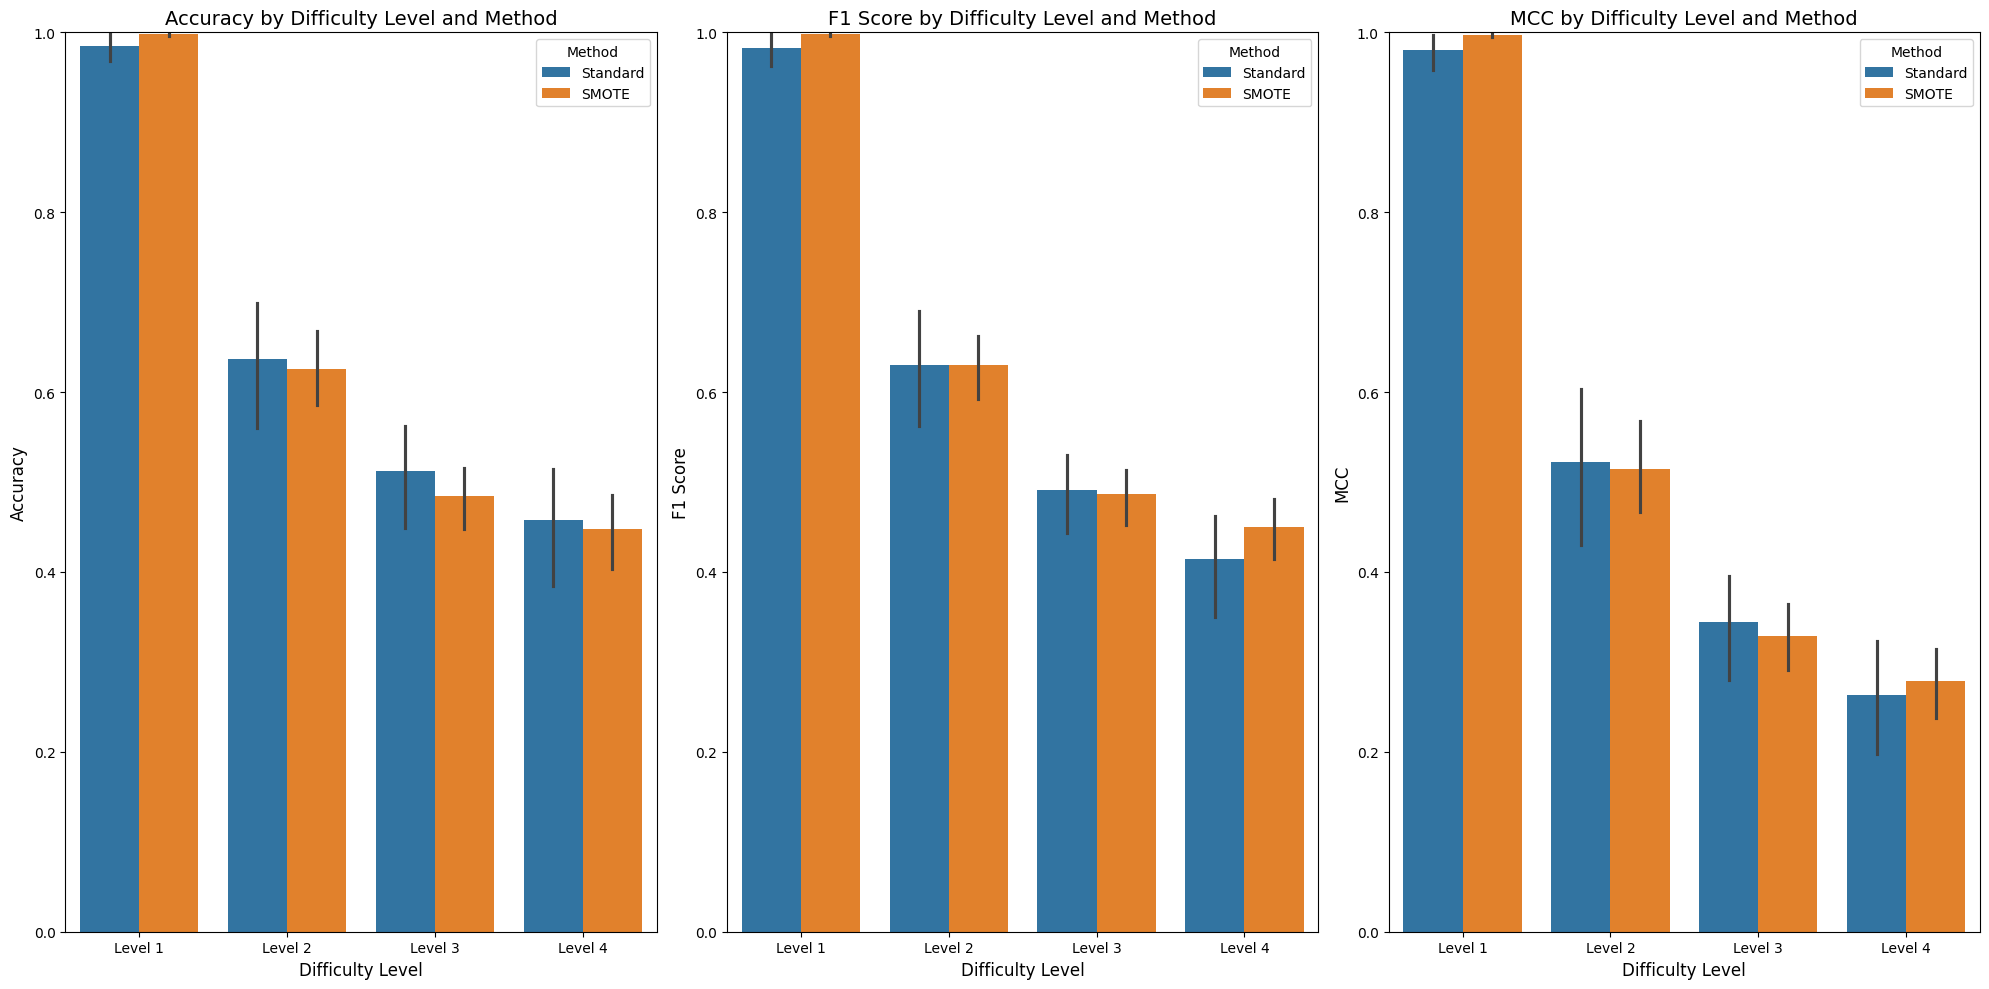


Standard Method - Accuracy:
Difficulty               Level 1   Level 2   Level 3   Level 4
Model                                                         
AdaBoost                0.959488  0.585288  0.437100  0.401919
Balanced Random Forest  0.934968  0.399787  0.333689  0.208955
Gradient Boosting       0.997868  0.700426  0.541578  0.491471
Random Forest           0.997868  0.660981  0.553305  0.523454
Stacking                0.998934  0.655650  0.541578  0.521322
Voting (Hard)           0.995736  0.643923  0.530917  0.478678
Voting (Soft)           0.998934  0.658849  0.545842  0.481876
XGBoost                 0.996802  0.793177  0.610874  0.553305

Standard Method - F1 Score:
Difficulty               Level 1   Level 2   Level 3   Level 4
Model                                                         
AdaBoost                0.942583  0.589238  0.422492  0.377676
Balanced Random Forest  0.936575  0.426868  0.362254  0.240583
Gradient Boosting       0.997868  0.685107  0.509374  0.4264

<Figure size 2000x1200 with 0 Axes>

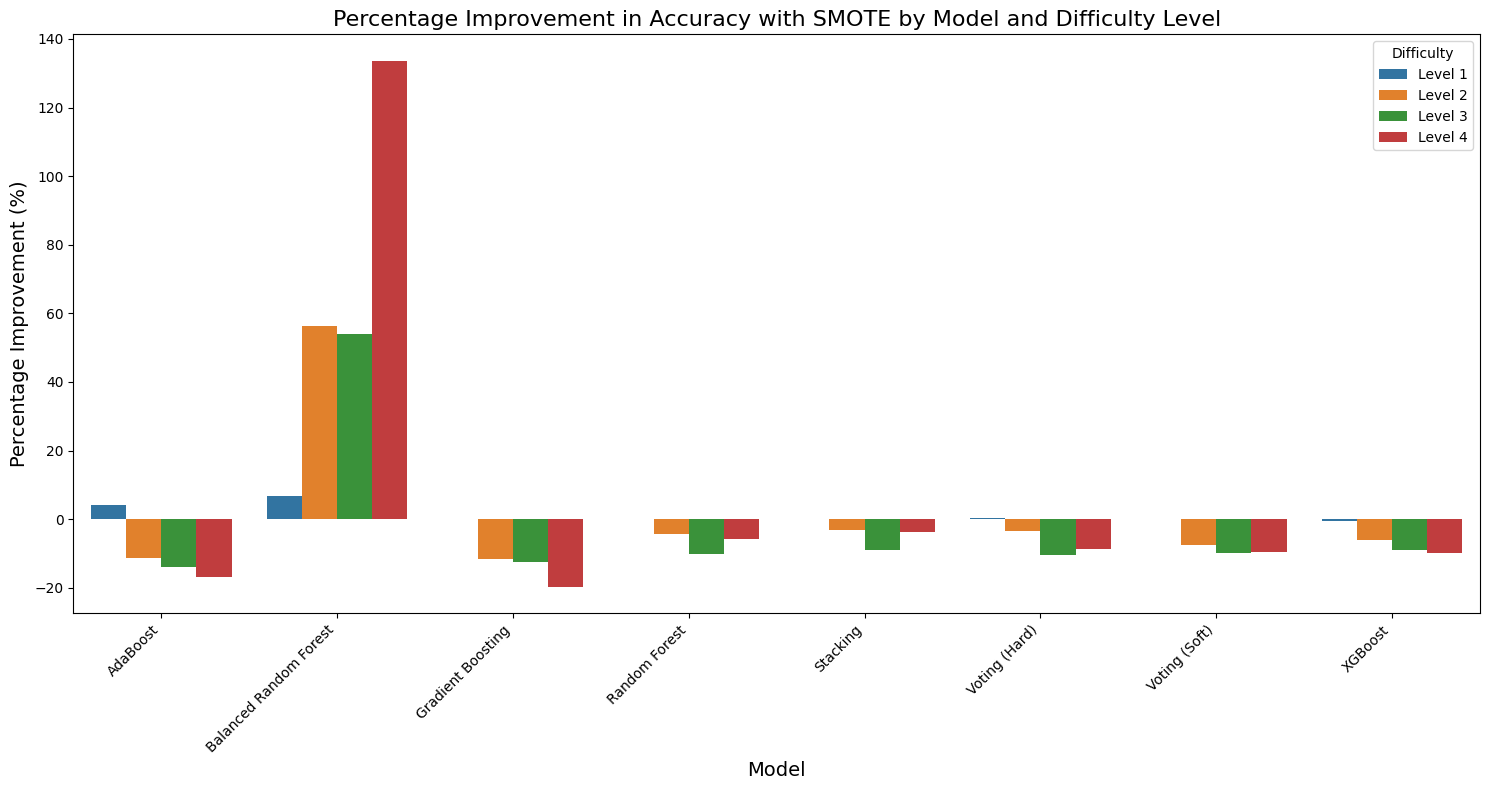

In [30]:

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Entrenamos con etiquetas numéricas
# Function to evaluate model with comprehensive metrics
def evaluate_model_comprehensive(model_name, model, X_train, X_test, y_train, y_test, difficulty_level, label_encoder=None, is_smote=False):

    if model_name == 'XGBoost' and label_encoder is not None:
        y_train_encoded = label_encoder.transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)
        model.fit(X_train, y_train_encoded)
        y_pred_encoded = model.predict(X_test)
        y_pred = label_encoder.inverse_transform(y_pred_encoded)
    else:
        # Para otros modelos, entrenamiento normal
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_test, y_pred)

    method_type = "SMOTE" if is_smote else "Standard"

    return {
        'Model': model_name,
        'Difficulty': difficulty_level,
        'Method': method_type,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'MCC': mcc,
        'Feature Count': X_train.shape[1]
    }

# Creamos nuestro label encoder para XGBoost
label_encoder = LabelEncoder()

# List of models to evaluate
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=42),
    'Balanced Random Forest': BalancedRandomForestClassifier(n_estimators=100, random_state=42),
    'Voting (Hard)': VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(random_state=42)),
            ('gb', GradientBoostingClassifier(random_state=42)),
            ('svc', SVC(random_state=42))
        ],
        voting='hard'
    ),
    'Voting (Soft)': VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(random_state=42)),
            ('gb', GradientBoostingClassifier(random_state=42)),
            ('svc', SVC(probability=True, random_state=42))
        ],
        voting='soft'
    ),
    'Stacking': StackingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000, random_state=42)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('svc', SVC(probability=True, random_state=42))
        ],
        final_estimator=RandomForestClassifier(random_state=42),
        cv=5
    ),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

# Load
levels = {
    'Level 1': pd.read_csv('nasa_asteroids_level1_difficulty.csv'),
    'Level 2': pd.read_csv('nasa_asteroids_level2_difficulty.csv'),
    'Level 3': pd.read_csv('nasa_asteroids_level3_difficulty.csv'),
    'Level 4': pd.read_csv('nasa_asteroids_level4_difficulty.csv')
}

# Target variable
target = 'OrbitalType'

standard_results = []
smote_results = []

# Definimos las clases para el LabelEncoder
all_classes = set()
for _, df in levels.items():
    all_classes.update(df[target].unique())
label_encoder.fit(list(all_classes))

# Loop through each difficulty level
for level_name, df in levels.items():
    print(f"\nEvaluating models on {level_name}...")
    X = df.drop(columns=['OrbitalType', 'RiskClass', 'ScientificPotential', 'Hazardous',
                         'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date',
                         'Equinox'], errors='ignore')
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 1. Standard without SMOTE
    print("  Standard evaluation (without SMOTE):")
    for model_name, model in models.items():
        print(f"    Training {model_name}...")
        try:
            result = evaluate_model_comprehensive(
                model_name, model, X_train, X_test, y_train, y_test,
                level_name, label_encoder if model_name == 'XGBoost' else None, is_smote=False
            )
            standard_results.append(result)
            print(f"      Accuracy: {result['Accuracy']:.4f}, F1 Score: {result['F1 Score']:.4f}, MCC: {result['MCC']:.4f}")
        except Exception as e:
            print(f"      Error with {model_name}: {e}")
            continue

    # 2. Apply SMOTE for imbalance mitigation
    print("  Applying SMOTE for class balance:")
    try:
        smote = SMOTE(random_state=42, k_neighbors=4)
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        print(f"    Original class distribution: {pd.Series(y_train).value_counts().to_dict()}")
        print(f"    SMOTE class distribution: {pd.Series(y_train_smote).value_counts().to_dict()}")

        for model_name, model in models.items():
            print(f"    Training {model_name} with SMOTE...")
            try:
                result = evaluate_model_comprehensive(
                    model_name, model, X_train_smote, X_test, y_train_smote, y_test,
                    level_name, label_encoder if model_name == 'XGBoost' else None, is_smote=True
                )
                smote_results.append(result)
                print(f"      Accuracy: {result['Accuracy']:.4f}, F1 Score: {result['F1 Score']:.4f}, MCC: {result['MCC']:.4f}")
            except Exception as e:
                print(f"      Error with {model_name} using SMOTE: {e}")
                continue
    except Exception as e:
        print(f"  Error applying SMOTE: {e}")
        continue

all_results = standard_results + smote_results
results_df = pd.DataFrame(all_results)

# Visualize results comparing standard vs SMOTE
plt.figure(figsize=(20, 10))
for i, metric in enumerate(['Accuracy', 'F1 Score', 'MCC']):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='Difficulty', y=metric, hue='Method', data=results_df)
    plt.title(f'{metric} by Difficulty Level and Method', fontsize=14)
    plt.xlabel('Difficulty Level', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.ylim(0, 1)
    plt.legend(title='Method')

plt.tight_layout()
plt.savefig('metrics_comparison_smote_vs_standard.png')
plt.show()

#  visualizar
plt.figure(figsize=(20, 12))
sns.catplot(
    data=results_df, x='Difficulty', y='Accuracy',
    hue='Method', col='Model', kind='bar',
    height=4, aspect=1.2, col_wrap=4
)
plt.tight_layout()
plt.savefig('model_method_comparison.png')
plt.close()

# Summary tables
for method in ['Standard', 'SMOTE']:
    subset = results_df[results_df['Method'] == method]
    pivot_acc = subset.pivot_table(index='Model', columns='Difficulty', values='Accuracy')
    pivot_f1 = subset.pivot_table(index='Model', columns='Difficulty', values='F1 Score')
    pivot_mcc = subset.pivot_table(index='Model', columns='Difficulty', values='MCC')

    print(f"\n{method} Method - Accuracy:")
    print(pivot_acc)

    print(f"\n{method} Method - F1 Score:")
    print(pivot_f1)

    print(f"\n{method} Method - MCC:")
    print(pivot_mcc)

# Calculate improvement from SMOTE
standard_df = results_df[results_df['Method'] == 'Standard']
smote_df = results_df[results_df['Method'] == 'SMOTE']


if not standard_df.empty and not smote_df.empty:
    improvement = pd.merge(
        standard_df, smote_df,
        on=['Model', 'Difficulty'],
        suffixes=('_std', '_smote')
    )

    # Calculate improvements
    for metric in ['Accuracy', 'F1 Score', 'MCC']:
        improvement[f'{metric}_improvement'] = improvement[f'{metric}_smote'] - improvement[f'{metric}_std']
        improvement[f'{metric}_pct_improvement'] = improvement.apply(
            lambda row: (row[f'{metric}_improvement'] / row[f'{metric}_std'] * 100)
            if row[f'{metric}_std'] != 0 else float('nan'),
            axis=1
        )

    metrics_to_include = [
        'Accuracy_improvement', 'F1 Score_improvement', 'MCC_improvement',
        'Accuracy_pct_improvement', 'F1 Score_pct_improvement', 'MCC_pct_improvement'
    ]


    improvement_summary = improvement.groupby(['Model', 'Difficulty'])[metrics_to_include].mean().reset_index()

    print("\nImprovement from SMOTE:")
    print(improvement_summary)

    # Visualize SMOTE
    plt.figure(figsize=(15, 8))
    sns.barplot(
        data=improvement_summary, x='Model', y='Accuracy_pct_improvement',
        hue='Difficulty'
    )
    plt.title('Percentage Improvement in Accuracy with SMOTE by Model and Difficulty Level', fontsize=16)
    plt.xlabel('Model', fontsize=14)
    plt.ylabel('Percentage Improvement (%)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('smote_improvement_by_model.png')
    plt.show()
else:
    print("\nCannot calculate improvement - standard_df or smote_df is empty.")
    print(f"Standard data shape: {standard_df.shape}")
    print(f"SMOTE data shape: {smote_df.shape}")

# - 1. Hyperparameter Tuning (for extra credit)


*   Use optuna for hyperparameter tuning using a pruner or a heuristic.

*  Understand how Matthews Correlation Coefficient (MCC) can be used to measure the performance of the models and use it as an additional metric.  



In [31]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.7 MB/s eta 0:00:00


[I 2025-03-31 22:09:23,927] A new study created in memory with name: no-name-0e53d405-10bb-4990-9f07-5df4d7793698
[I 2025-03-31 22:10:00,294] Trial 0 finished with value: 0.9926363201567513 and parameters: {'learning_rate': 0.05316480070908041, 'max_depth': 9, 'min_child_weight': 6, 'gamma': 0.18122290741587754, 'subsample': 0.8939094304907407, 'colsample_bytree': 0.7660269531561119, 'reg_alpha': 8.568697824278836e-05, 'reg_lambda': 0.12650961914516018, 'n_estimators': 170}. Best is trial 0 with value: 0.9926363201567513.
[I 2025-03-31 22:10:09,072] Trial 1 finished with value: 0.9926366830744578 and parameters: {'learning_rate': 0.04220564221878272, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 0.2104222245630101, 'subsample': 0.5840261469530834, 'colsample_bytree': 0.8116277016704851, 'reg_alpha': 1.0039417472240973e-07, 'reg_lambda': 4.5845614880248625e-08, 'n_estimators': 273}. Best is trial 1 with value: 0.9926366830744578.
[I 2025-03-31 22:10:15,652] Trial 2 finished with value

Mejores hiperparámetros:
{'learning_rate': 0.018989188001609467, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 5.299703553766622e-05, 'subsample': 0.666255468152256, 'colsample_bytree': 0.9298240651171668, 'reg_alpha': 0.0005110799675533457, 'reg_lambda': 1.0891665936500362e-08, 'n_estimators': 228}
Mejor valor de MCC: 0.9947412104391011
MCC en el conjunto de prueba: 0.9972


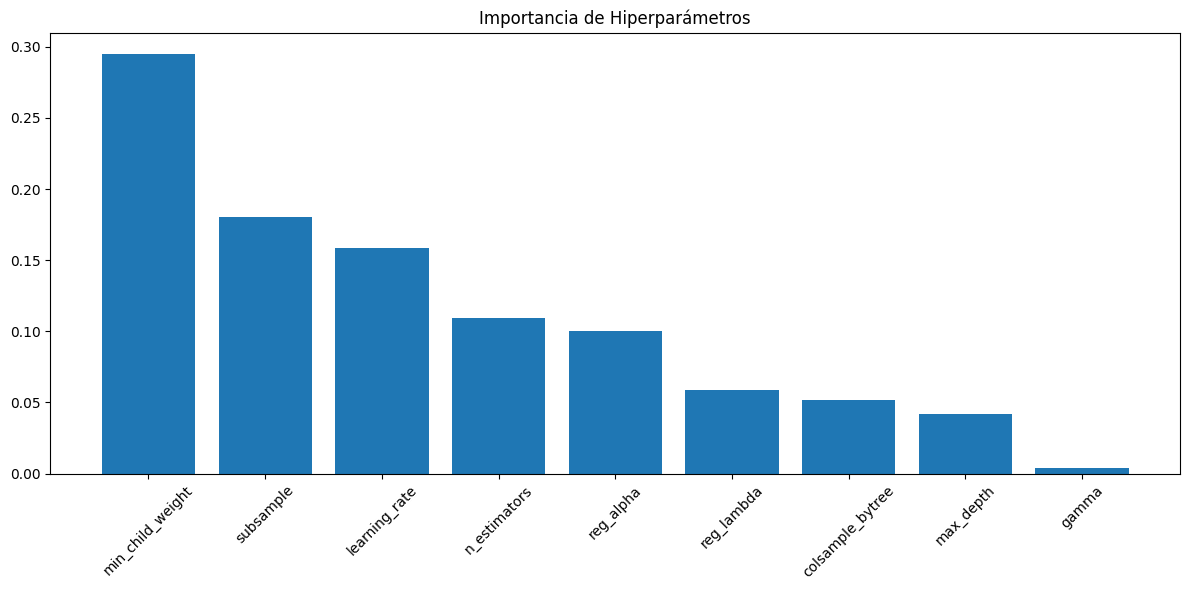

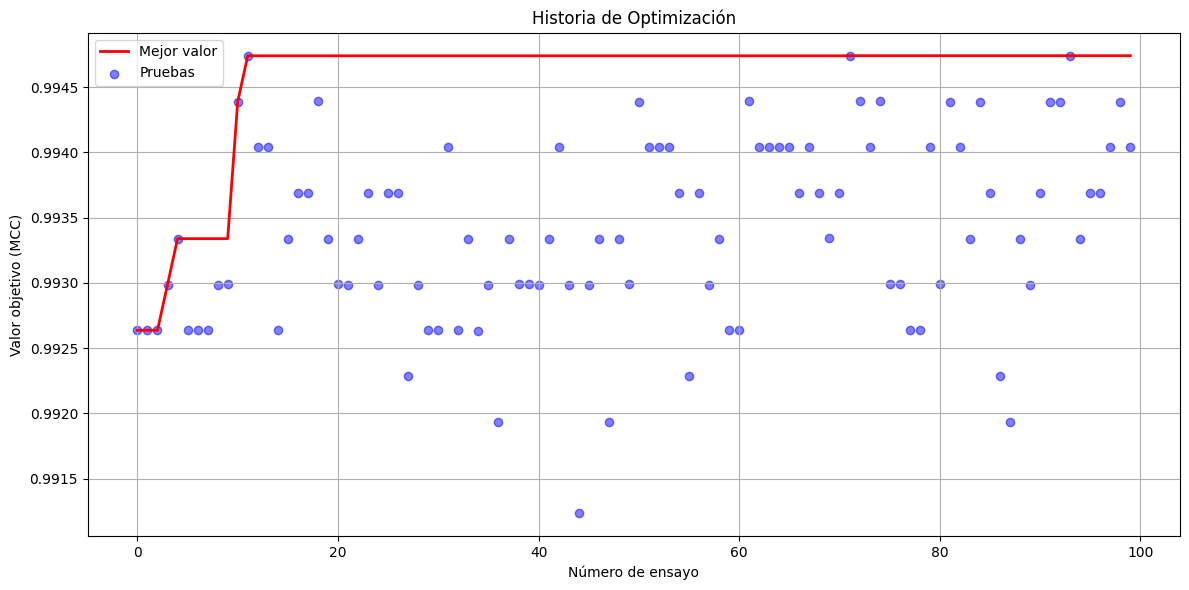

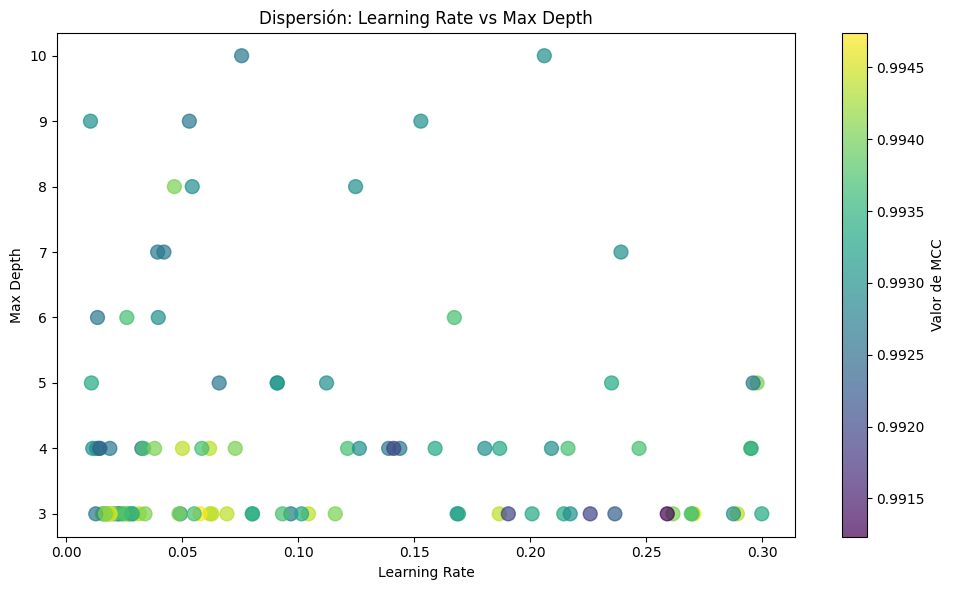

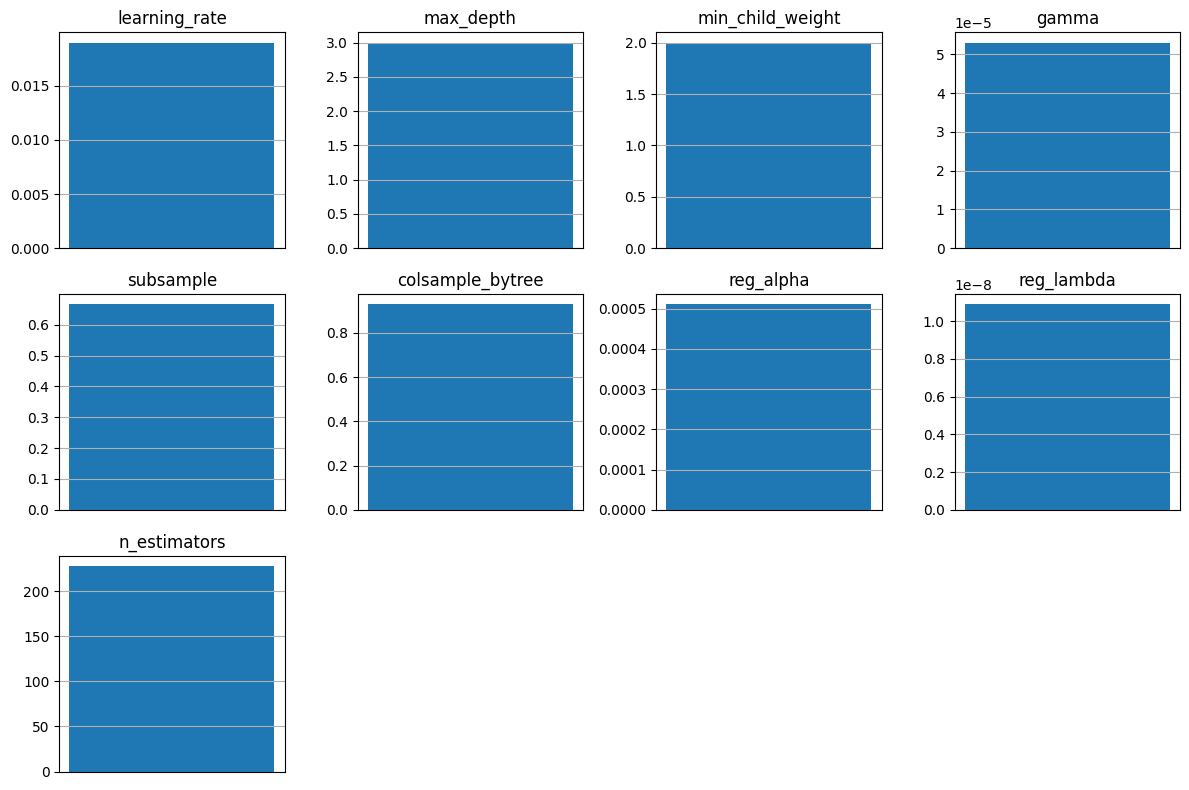

MCC del modelo XGBoost con hiperparámetros por defecto: 0.9958
MCC del modelo XGBoost optimizado con Optuna: 0.9972
Mejora con Optuna: 0.14%

Comparación de métricas:
  Métrica  Modelo Base  Modelo Optimizado  Mejora (%)
 Accuracy       0.9968             0.9979      0.1070
Precision       0.9968             0.9979      0.1062
   Recall       0.9968             0.9979      0.1070
 F1 Score       0.9968             0.9979      0.1073
      MCC       0.9958             0.9972      0.1406


In [32]:
import optuna
from optuna.pruners import MedianPruner
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef, make_scorer
from optuna.visualization import plot_param_importances, plot_contour, plot_optimization_history
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargar los datos (asumiendo que ya tienes X_train, X_test, y_train, y_test)
# Ejemplo de cómo cargarlos si no los tienes preparados:
df = pd.read_csv('nasa_asteroids_level1_difficulty.csv')
X = df.drop(columns=['OrbitalType', 'RiskClass', 'ScientificPotential', 'Hazardous',
                     'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date',
                     'Equinox'], errors='ignore')
y = df['OrbitalType']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

def objective(trial):
    # Definir el espacio de hiperparámetros a explorar
    params = {
        'objective': 'multi:softmax',
        'num_class': len(np.unique(y_train)),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'random_state': 42
    }

    model = xgb.XGBClassifier(**params)


    mcc_scorer = make_scorer(matthews_corrcoef)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=mcc_scorer)

    return scores.mean()

# Crear el estudio con el MedianPruner
pruner = MedianPruner(n_startup_trials=5, n_warmup_steps=5, interval_steps=1)
study = optuna.create_study(direction='maximize', pruner=pruner)


study.optimize(objective, n_trials=100)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(study.best_params)
print("Mejor valor de MCC:", study.best_value)


best_model = xgb.XGBClassifier(**study.best_params)
best_model.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred = best_model.predict(X_test)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"MCC en el conjunto de prueba: {mcc:.4f}")

# Visualizaciones de Optuna

importances = optuna.importance.get_param_importances(study)
plt.figure(figsize=(12, 6))
plt.bar(importances.keys(), importances.values())
plt.title('Importancia de Hiperparámetros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('optuna_param_importances_manual.png')
plt.show()


plt.figure(figsize=(12, 6))
trials_df = study.trials_dataframe()
trials_df = trials_df.sort_values('number')

# Visualizar la mejor puntuación hasta el momento
best_scores = np.maximum.accumulate(trials_df['value'])
plt.plot(trials_df['number'], best_scores, 'r-', linewidth=2, label='Mejor valor')

# Puntos para cada prueba
plt.scatter(trials_df['number'], trials_df['value'], alpha=0.5, color='blue', label='Pruebas')

plt.xlabel('Número de ensayo')
plt.ylabel('Valor objetivo (MCC)')
plt.title('Historia de Optimización')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('optuna_history_manual.png')
plt.show()

# 3. Gráfico de dispersión para learning_rate vs max_depth
plt.figure(figsize=(10, 6))
plt.scatter(
    x=trials_df['params_learning_rate'],
    y=trials_df['params_max_depth'],
    c=trials_df['value'],
    cmap='viridis',
    s=100,
    alpha=0.7
)
plt.colorbar(label='Valor de MCC')
plt.xlabel('Learning Rate')
plt.ylabel('Max Depth')
plt.title('Dispersión: Learning Rate vs Max Depth')
plt.tight_layout()
plt.savefig('optuna_scatter_manual.png')
plt.show()

# 4. Visualización de los hiperparámetros óptimos
best_trial = study.best_trial
param_values = {}
for param_name, param_value in best_trial.params.items():
    param_values[param_name] = [param_value]

# Gráfico de barras para los valores óptimos
plt.figure(figsize=(12, 8))
for i, (param_name, values) in enumerate(param_values.items()):
    plt.subplot(3, 4, i+1)
    plt.bar(0, values[0])
    plt.title(param_name)
    plt.xticks([])
    plt.grid(axis='y')
plt.tight_layout()
plt.savefig('optimal_hyperparameters.png')
plt.show()

# Comparación con el modelo XGBoost anterior
previous_xgb = xgb.XGBClassifier(random_state=42)
previous_xgb.fit(X_train, y_train)
previous_pred = previous_xgb.predict(X_test)
previous_mcc = matthews_corrcoef(y_test, previous_pred)

improvement = (mcc - previous_mcc) / previous_mcc * 100
print(f"MCC del modelo XGBoost con hiperparámetros por defecto: {previous_mcc:.4f}")
print(f"MCC del modelo XGBoost optimizado con Optuna: {mcc:.4f}")
print(f"Mejora con Optuna: {improvement:.2f}%")

# Comparación de métricas adicionales
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Métricas para el modelo anterior
previous_accuracy = accuracy_score(y_test, previous_pred)
previous_precision = precision_score(y_test, previous_pred, average='weighted')
previous_recall = recall_score(y_test, previous_pred, average='weighted')
previous_f1 = f1_score(y_test, previous_pred, average='weighted')

# Métricas para el modelo optimizado
optimized_accuracy = accuracy_score(y_test, y_pred)
optimized_precision = precision_score(y_test, y_pred, average='weighted')
optimized_recall = recall_score(y_test, y_pred, average='weighted')
optimized_f1 = f1_score(y_test, y_pred, average='weighted')

# Tabla comparativa
metrics_data = {
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Modelo Base': [previous_accuracy, previous_precision, previous_recall, previous_f1, previous_mcc],
    'Modelo Optimizado': [optimized_accuracy, optimized_precision, optimized_recall, optimized_f1, mcc],
    'Mejora (%)': [
        100 * (optimized_accuracy - previous_accuracy) / previous_accuracy,
        100 * (optimized_precision - previous_precision) / previous_precision,
        100 * (optimized_recall - previous_recall) / previous_recall,
        100 * (optimized_f1 - previous_f1) / previous_f1,
        improvement
    ]
}

metrics_df = pd.DataFrame(metrics_data)
print("\nComparación de métricas:")
print(metrics_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))